In [1]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
analysis = scripts.Analysis()

In [3]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'co2',
                          'band03a_wn_540_620',
                          'P_50_T_250',
                          'min_5e-24_max_5e-19_ng_8',
                          'wgt_.8_.4_.3_.3_.2_.5_.5_1',
                          'dgs',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [4]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'co2',
                               'band03a_wn_540_620',
                               'P_50_T_250',
                               'min_5e-24_max_5e-19_ng_8',
                               'wgt_.8_.4_.3_.3_.2_.5_.5_1',
                               'dgs',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [7]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5, 6, 7, 8]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [8]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [9]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [10]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [16]:
for g in [1, 2, 3, 4, 5, 6, 7, 8]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

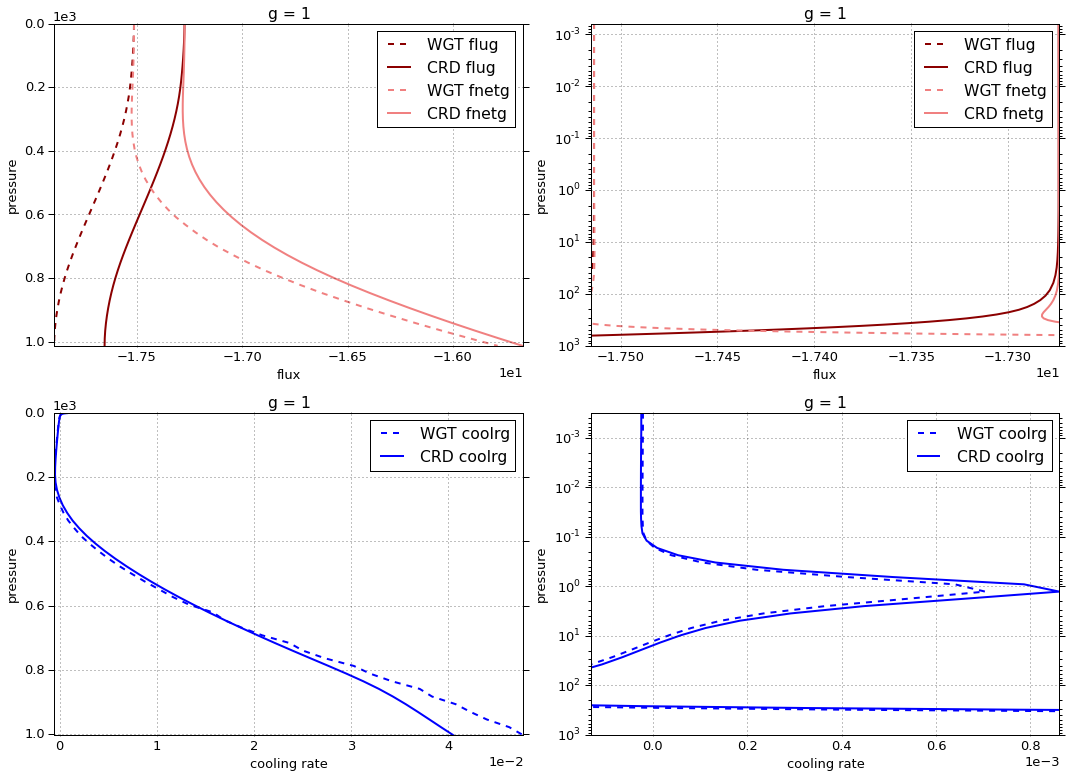

# Figure: flux, cooling rate. g-group 2

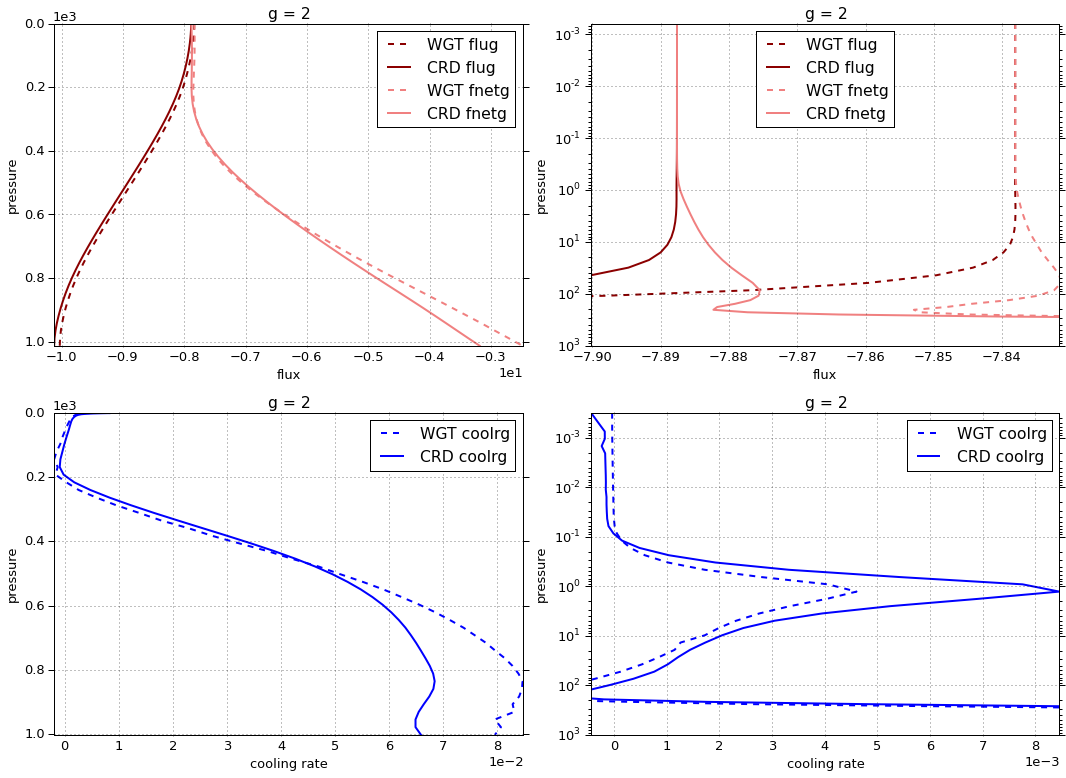

# Figure: flux, cooling rate. g-group 3

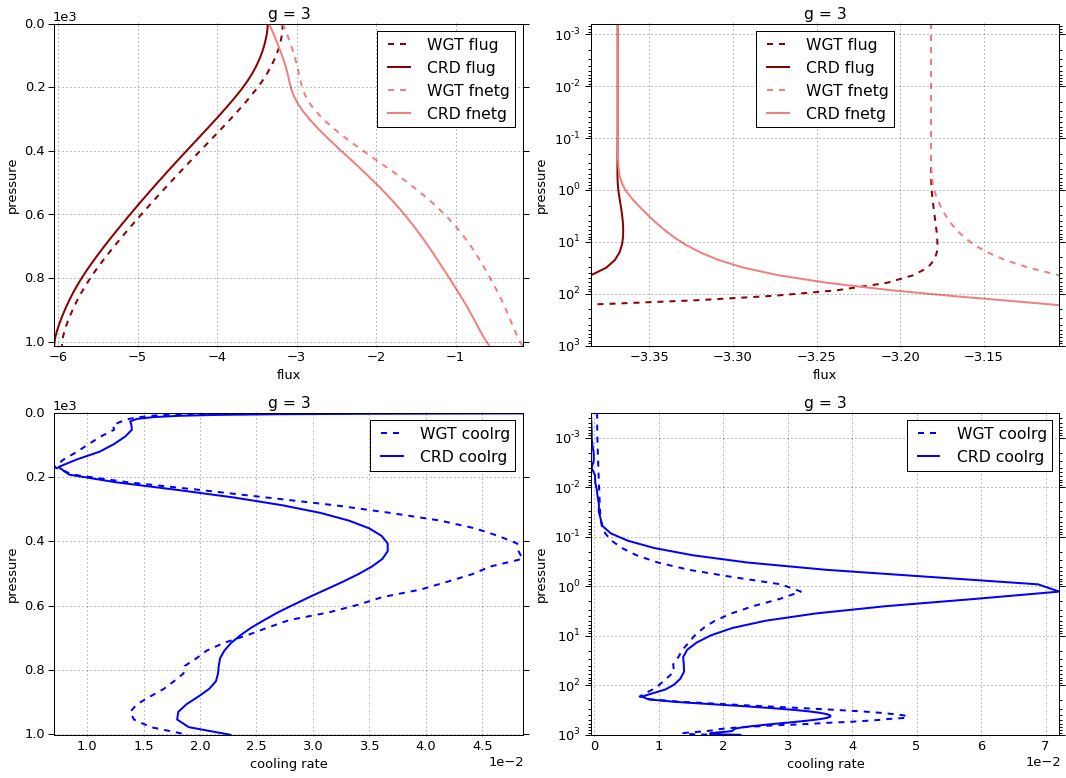

# Figure: flux, cooling rate. g-group 4

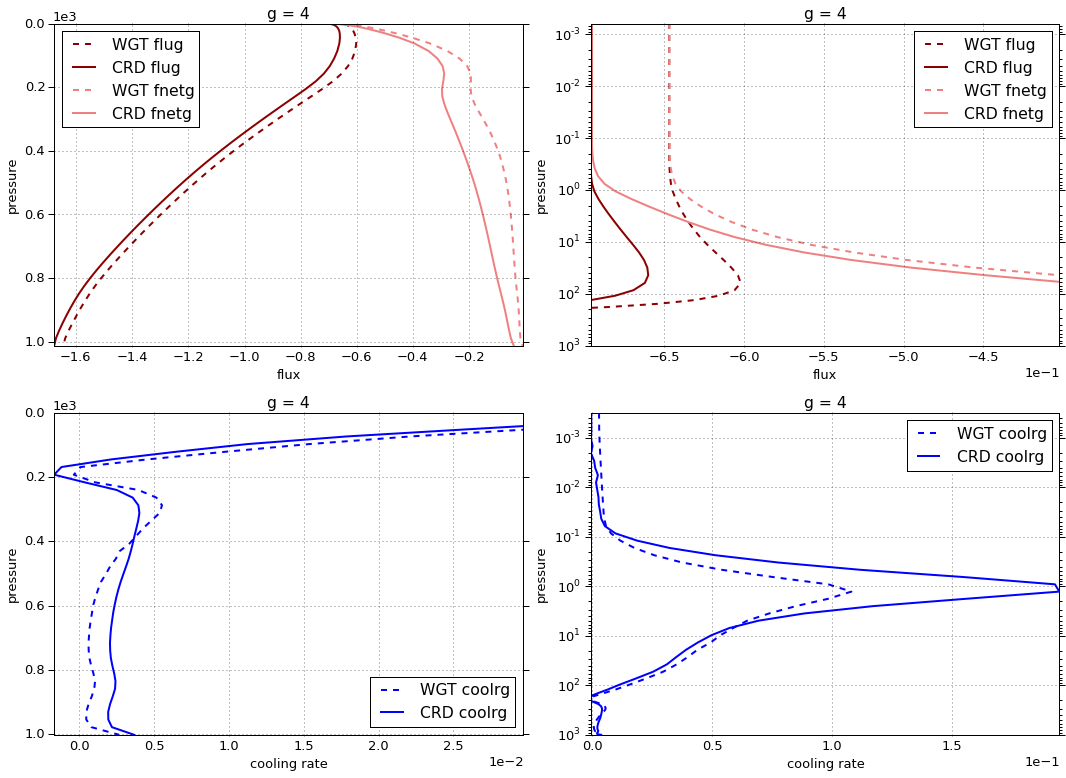

# Figure: flux, cooling rate. g-group 5

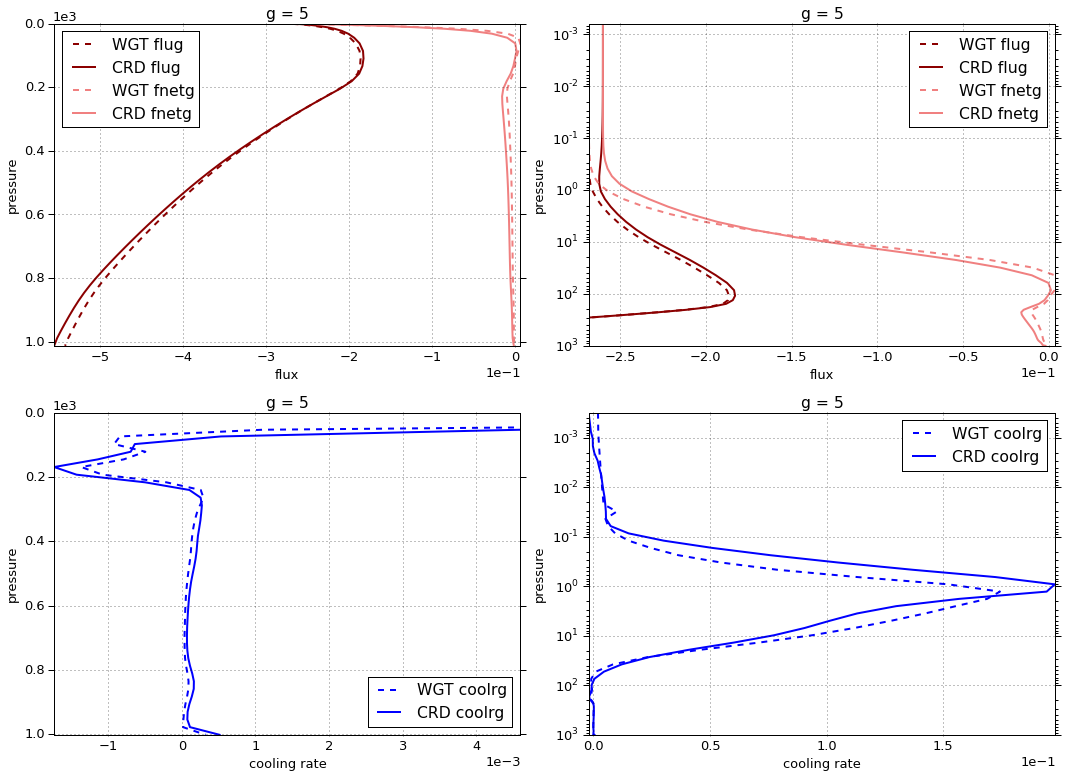

# Figure: flux, cooling rate. g-group 6

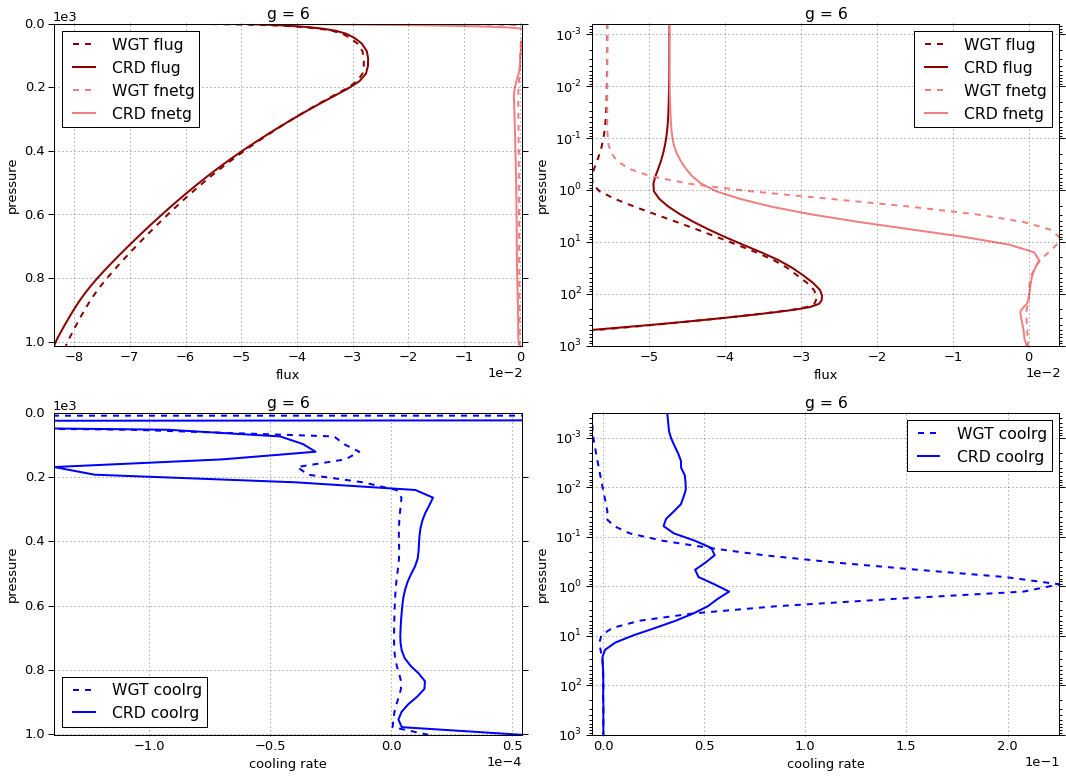

# Figure: flux, cooling rate. g-group 7

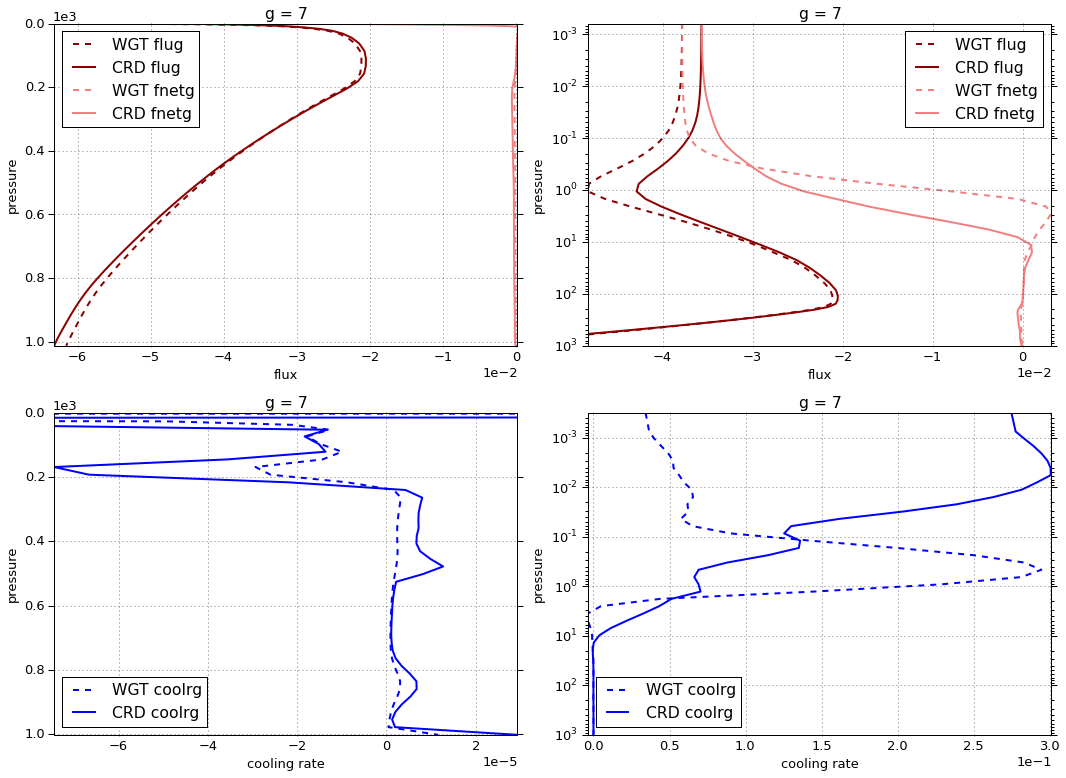

# Figure: flux, cooling rate. g-group 8

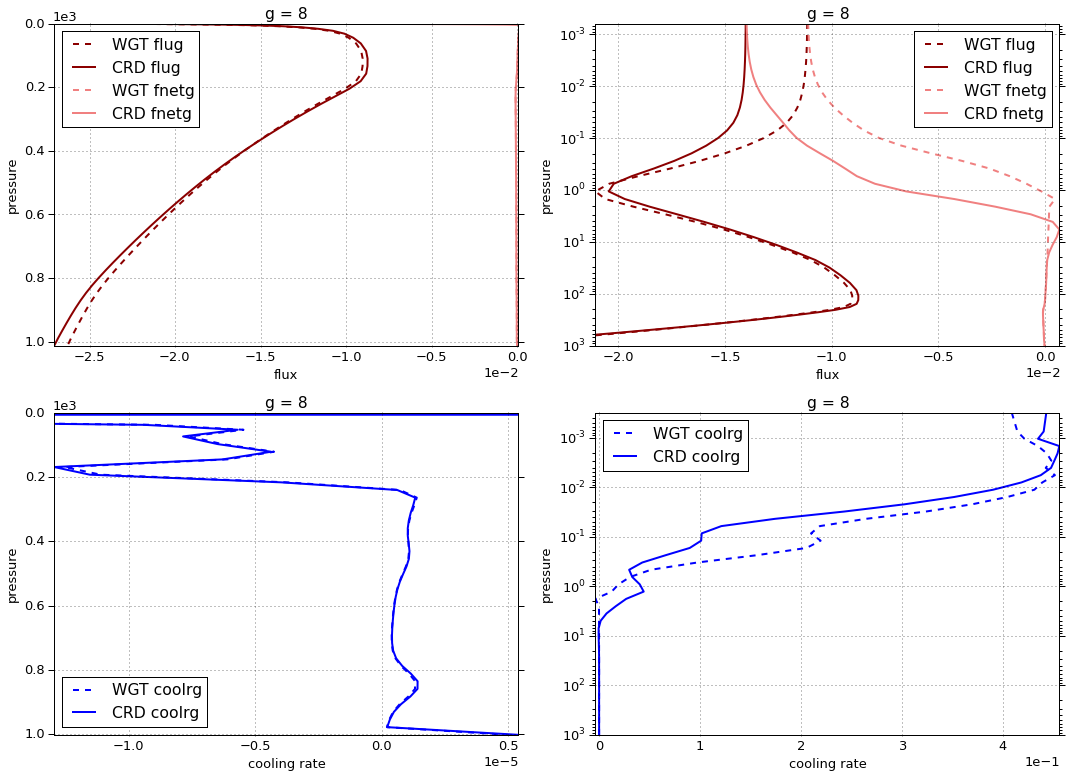

# Figure: flux, cooling rate. g-group total

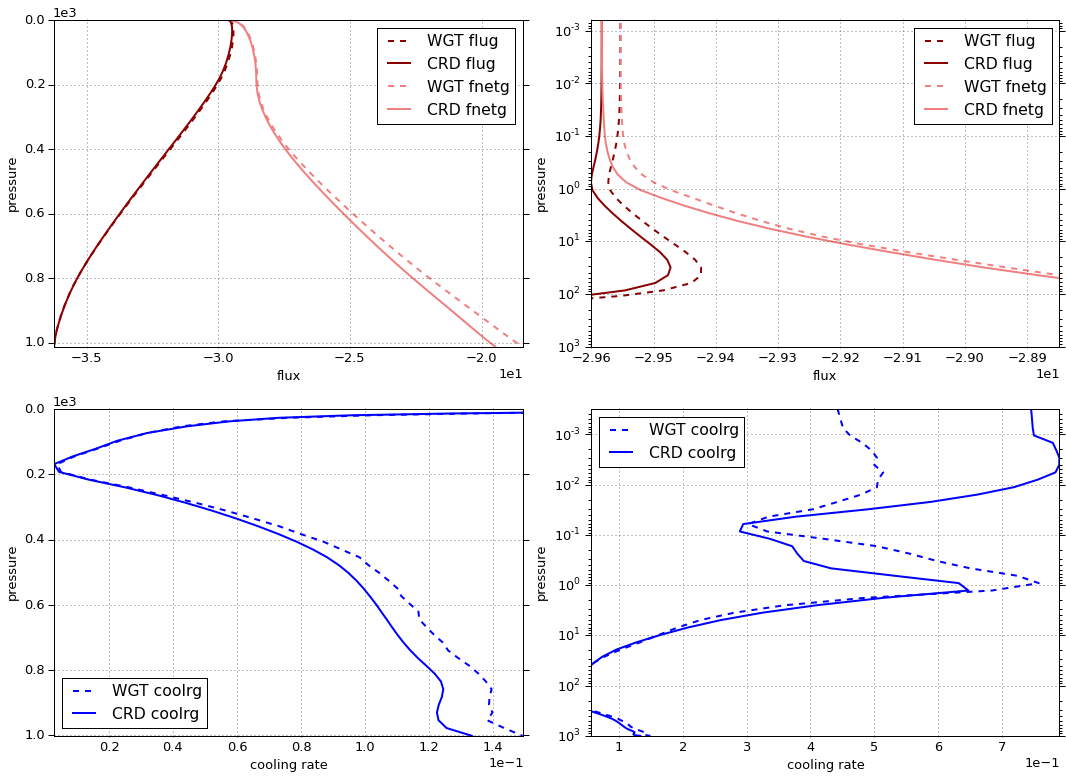

In [15]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [17]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -17.274023  0.000000 -17.274023
  1013     76    -17.653253  1.982048 -15.671205
2 0        1      -7.887605  0.000000  -7.887605
  1013     76    -10.122455  6.940663  -3.181792
3 0        1      -3.368837  0.000000  -3.368837
  1013     76     -6.052099  5.477384  -0.574715
4 0        1      -0.695559  0.000000  -0.695559
  1013     76     -1.678040  1.637050  -0.040989
5 0        1      -0.260110  0.000000  -0.260110
  1013     76     -0.555727  0.553833  -0.001895
6 0        1      -0.047365  0.000000  -0.047365
  1013     76     -0.083561  0.083401  -0.000160
7 0        1      -0.035702  0.000000  -0.035702
  1013     76     -0.063214  0.063128  -0.000086
8 0        1      -0.014023  0.000000  -0.014023
  1013     76     -0.027070  0.027055  -0.000015


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -17.513665  0.000000 -17.513665
  1013     76    -17.892366  2.103149 -15.789217
2 0        1      -7.838100  0.000000  -7.838100
  1013     76    -10.031035  7.546917  -2.484118
3 0        1      -3.181675  0.000000  -3.181675
  1013     76     -5.954731  5.797301  -0.157430
4 0        1      -0.646976  0.000000  -0.646976
  1013     76     -1.645388  1.635574  -0.009814
5 0        1      -0.268355  0.000000  -0.268355
  1013     76     -0.542569  0.541675  -0.000894
6 0        1      -0.055547  0.000000  -0.055547
  1013     76     -0.081477  0.081434  -0.000043
7 0        1      -0.037843  0.000000  -0.037843
  1013     76     -0.061561  0.061529  -0.000032
8 0        1      -0.011135  0.000000  -0.011135
  1013     76     -0.026292  0.026279  -0.000014


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1     -0.239642  0.000000 -0.239642
  1013     76    -0.239113  0.121101 -0.118012
2 0        1      0.049505  0.000000  0.049505
  1013     76     0.091420  0.606254  0.697674
3 0        1      0.187162  0.000000  0.187162
  1013     76     0.097367  0.319917  0.417285
4 0        1      0.048583  0.000000  0.048583
  1013     76     0.032652 -0.001477  0.031175
5 0        1     -0.008245  0.000000 -0.008245
  1013     76     0.013159 -0.012158  0.001001
6 0        1     -0.008182  0.000000 -0.008182
  1013     76     0.002084 -0.001967  0.000117
7 0        1     -0.002141  0.000000 -0.002141
  1013     76     0.001653 -0.001599  0.000054
8 0        1      0.002888  0.000000  0.002888
  1013     76     0.000777 -0.000776  0.000001

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000024
  1001.112500 75     0.040481
2 0.000312    1     -0.000442
  1001.112500 75     0.065887
3 0.000312    1     -0.000477
  1001.112500 75     0.022697
4 0.000312    1     -0.000487
  1001.112500 75     0.003668
5 0.000312    1     -0.001950
  1001.112500 75     0.000512
6 0.000312    1      0.031595
  1001.112500 75     0.000054
7 0.000312    1      0.274810
  1001.112500 75     0.000029
8 0.000312    1      0.442977
  1001.112500 75     0.000005


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000021
  1001.112500 75     0.047672
2 0.000312    1     -0.000039
  1001.112500 75     0.079563
3 0.000312    1      0.000481
  1001.112500 75     0.018939
4 0.000312    1      0.002761
  1001.112500 75     0.002666
5 0.000312    1      0.002051
  1001.112500 75     0.000321
6 0.000312    1     -0.005637
  1001.112500 75     0.000015
7 0.000312    1      0.034253
  1001.112500 75     0.000012
8 0.000312    1      0.408764
  1001.112500 75     0.000005


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      3.542069e-06
  1001.112500 75     7.191126e-03
2 0.000312    1      4.025733e-04
  1001.112500 75     1.367583e-02
3 0.000312    1      9.577151e-04
  1001.112500 75    -3.758569e-03
4 0.000312    1      3.247761e-03
  1001.112500 75    -1.001672e-03
5 0.000312    1      4.000345e-03
  1001.112500 75    -1.910728e-04
6 0.000312    1     -3.723116e-02
  1001.112500 75    -3.854442e-05
7 0.000312    1     -2.405575e-01
  1001.112500 75    -1.765571e-05
8 0.000312    1     -3.421237e-02
  1001.112500 75    -4.174800e-07

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-29.583224,0.000000,-29.583224
1013,76,-36.235418,16.764562,-19.470857



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-29.553296,0.000000,-29.553296
1013,76,-36.235419,17.793857,-18.441562



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,2.992785e-02,0.000000,0.029928
1013,76,-9.740000e-07,1.029295,1.029295


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.746002
1001.112500,75,0.133333



WGT


,,coolrg
pressure,layer,
0.000312,1,0.442613
1001.112500,75,0.149192



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.303389
1001.112500,75,0.015859


In [18]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.486938,0.493781
2,0.279313,0.276830
3,0.167187,0.164335
4,0.046375,0.045408
5,0.015375,0.014973
6,0.002312,0.002249
7,0.001750,0.001699
8,0.000750,0.000726


In [19]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

wgt                                           crd        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -17.513665  0.000000e+00 -17.513665   1     1   
0.000624      1     2 -17.513665  1.400344e-09 -17.513665   1     2   
0.000876      1     3 -17.513665  1.974391e-09 -17.513665   1     3   
0.001229      1     4 -17.513665  2.805731e-09 -17.513665   1     4   
0.001723      1     5 -17.513665  4.014816e-09 -17.513665   1     5   
0.002417      1     6 -17.513665  5.773245e-09 -17.513665   1     6   
0.003391      1     7 -17.513665  8.330923e-09 -17.513665   1     7   
0.004757      1     8 -17.513665  1.205133e-08 -17.513665   1     8   
0.006672      1     9 -17.513665  1.746300e-08 -17.513665   1     9   
0.009359      1    10 -17.513665  2.533567e-08 -17.513665   1    10   
0.013128      1    11 -17.513665  3.678986e-08 -17.513665   1    11   
0.018415      1    12 -17.513665  5.345839e-08 -17.513665   1    12   
0.025830      1    13 -17.513665  7.772192e-08 -17.513665   1    13   
0.036232      1    14 -17.513665  1.130612e-07 -17.513665   1    14   
0.050823      1    15 -17.513666  1.648908e-07 -17.513665   1    15   
0.071291      1    16 -17.513666  2.468877e-07 -17.513665   1    16   
0.100000      1    17 -17.513666  4.013726e-07 -17.513666   1    17   
0.140271      1    18 -17.513666  7.292846e-07 -17.513666   1    18   
0.196760      1    19 -17.513667  1.436478e-06 -17.513666   1    19   
0.275997      1    20 -17.513668  2.962744e-06 -17.513665   1    20   
0.387100      1    21 -17.513670  6.254537e-06 -17.513664   1    21   
0.543100      1    22 -17.513673  1.335419e-05 -17.513660   1    22   
0.761700      1    23 -17.513678  2.852145e-05 -17.513649   1    23   
1.068500      1    24 -17.513684  5.812188e-05 -17.513626   1    24   
1.498800      1    25 -17.513692  1.024874e-04 -17.513590   1    25   
2.102400      1    26 -17.513705  1.537963e-04 -17.513552   1    26   
2.949000      1    27 -17.513725  2.097078e-04 -17.513515   1    27   
4.136600      1    28 -17.513753  2.710314e-04 -17.513482   1    28   
5.802500      1    29 -17.513794  3.404750e-04 -17.513453   1    29   
8.139200      1    30 -17.513854  4.231194e-04 -17.513431   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -17.569177  4.546398e-02 -17.523713   1    47   
347.300000    1    48 -17.579276  5.805516e-02 -17.521221   1    48   
371.075000    1    49 -17.590211  7.325275e-02 -17.516959   1    49   
394.850000    1    50 -17.602131  9.132557e-02 -17.510805   1    50   
418.625000    1    51 -17.614722  1.125244e-01 -17.502198   1    51   
442.400000    1    52 -17.627953  1.370860e-01 -17.490867   1    52   
466.175000    1    53 -17.641841  1.652247e-01 -17.476616   1    53   
489.950000    1    54 -17.656263  1.971320e-01 -17.459131   1    54   
513.725000    1    55 -17.671043  2.329851e-01 -17.438058   1    55   
537.500000    1    56 -17.686180  2.729534e-01 -17.413226   1    56   
561.275000    1    57 -17.701552  3.172004e-01 -17.384352   1    57   
585.050000    1    58 -17.716957  3.654845e-01 -17.351473   1    58   
608.825000    1    59 -17.732416  4.185125e-01 -17.313903   1    59   
632.600000    1    60 -17.747724  4.783032e-01 -17.269421   1    60   
656.375000    1    61 -17.762854  5.411461e-01 -17.221708   1    61   
680.150000    1    62 -17.777661  6.087805e-01 -17.168881   1    62   
703.925000    1    63 -17.791975  6.818594e-01 -17.110116   1    63   
727.700000    1    64 -17.805702  7.622293e-01 -17.043473   1    64   
751.475000    1    65 -17.818705  8.458153e-01 -16.972890   1    65   
775.250000    1    66 -17.830885  9.349660e-01 -16.895920   1    66   
799.025000    1    67 -17.842128  1.031539e+00 -16.810588   1    67   
822.800000    1    68 -17.852251  1.131685e+00 -16.720567   1    68   
846.575000    1    69 -17.861289  1.

In [20]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

wgt                                          crd                   \
              g level       flug          fldg     fnetg   g level       flug   
pressure                                                                        
0.000000      2     1  -7.838100  0.000000e+00 -7.838100   2     1  -7.887605   
0.000624      2     2  -7.838100  9.222534e-09 -7.838100   2     2  -7.887605   
0.000876      2     3  -7.838100  1.299624e-08 -7.838100   2     3  -7.887605   
0.001229      2     4  -7.838100  1.843544e-08 -7.838100   2     4  -7.887605   
0.001723      2     5  -7.838100  2.630697e-08 -7.838100   2     5  -7.887605   
0.002417      2     6  -7.838100  3.769946e-08 -7.838100   2     6  -7.887605   
0.003391      2     7  -7.838100  5.419220e-08 -7.838100   2     7  -7.887605   
0.004757      2     8  -7.838100  7.807425e-08 -7.838100   2     8  -7.887605   
0.006672      2     9  -7.838100  1.126643e-07 -7.838100   2     9  -7.887605   
0.009359      2    10  -7.838100  1.627852e-07 -7.838100   2    10  -7.887605   
0.013128      2    11  -7.838100  2.354498e-07 -7.838100   2    11  -7.887606   
0.018415      2    12  -7.838100  3.408793e-07 -7.838100   2    12  -7.887606   
0.025830      2    13  -7.838100  4.940050e-07 -7.838100   2    13  -7.887607   
0.036232      2    14  -7.838100  7.167519e-07 -7.838100   2    14  -7.887607   
0.050823      2    15  -7.838101  1.043351e-06 -7.838100   2    15  -7.887608   
0.071291      2    16  -7.838101  1.555191e-06 -7.838100   2    16  -7.887610   
0.100000      2    17  -7.838102  2.486452e-06 -7.838099   2    17  -7.887612   
0.140271      2    18  -7.838103  4.365846e-06 -7.838099   2    18  -7.887616   
0.196760      2    19  -7.838105  8.224654e-06 -7.838097   2    19  -7.887622   
0.275997      2    20  -7.838107  1.617555e-05 -7.838091   2    20  -7.887631   
0.387100      2    21  -7.838110  3.259848e-05 -7.838078   2    21  -7.887643   
0.543100      2    22  -7.838113  6.664461e-05 -7.838046   2    22  -7.887658   
0.761700      2    23  -7.838111  1.368785e-04 -7.837974   2    23  -7.887671   
1.068500      2    24  -7.838098  2.719002e-04 -7.837826   2    24  -7.887676   
1.498800      2    25  -7.838075  4.832515e-04 -7.837592   2    25  -7.887671   
2.102400      2    26  -7.838057  7.543287e-04 -7.837303   2    26  -7.887688   
2.949000      2    27  -7.838059  1.091130e-03 -7.836968   2    27  -7.887745   
4.136600      2    28  -7.838099  1.518438e-03 -7.836580   2    28  -7.887864   
5.802500      2    29  -7.838204  2.081312e-03 -7.836123   2    29  -7.888073   
8.139200      2    30  -7.838429  2.856543e-03 -7.835573   2    30  -7.888423   
...          ..   ...        ...           ...       ...  ..   ...        ...   
323.525000    2    47  -8.302615  5.401048e-01 -7.762511   2    47  -8.370069   
347.300000    2    48  -8.369612  6.575248e-01 -7.712087   2    48  -8.438425   
371.075000    2    49  -8.439873  7.922933e-01 -7.647579   2    49  -8.509465   
394.850000    2    50  -8.512363  9.417103e-01 -7.570653   2    50  -8.582701   
418.625000    2    51  -8.587287  1.107856e+00 -7.479431   2    51  -8.657667   
442.400000    2    52  -8.663136  1.289535e+00 -7.373601   2    52  -8.733955   
466.175000    2    53  -8.740453  1.485304e+00 -7.255149   2    53  -8.811215   
489.950000    2    54  -8.818717  1.695724e+00 -7.122993   2    54  -8.889152   
513.725000    2    55  -8.897370  1.917783e+00 -6.979587   2    55  -8.967513   
537.500000    2    56  -8.976310  2.151880e+00 -6.824431   2    56  -9.046042   
561.275000    2    57  -9.055210  2.396771e+00 -6.658439   2    57  -9.124480   
585.050000    2    58  -9.133683  2.650786e+00 -6.482898   2    58  -9.202559   
608.825000    2    59  -9.211350  2.913240e+00 -6.298110   2    59  -9.279984   
632.600000    2    60  -9.288064  3.183087e+00 -6.104977   2    60  -9.356459   
656.375000    2    61  -9.363272  3.458941e+00 -5.904331   2    61  -9.431645   
680.150000    2    62  -9.436557  3.739948e

In [21]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      3     1 -3.181675  0.000000e+00 -3.181675   3     1 -3.368837   
0.000624      3     2 -3.181675  8.905499e-08 -3.181675   3     2 -3.368837   
0.000876      3     3 -3.181675  1.254163e-07 -3.181675   3     3 -3.368837   
0.001229      3     4 -3.181675  1.775882e-07 -3.181675   3     4 -3.368837   
0.001723      3     5 -3.181675  2.527268e-07 -3.181675   3     5 -3.368838   
0.002417      3     6 -3.181675  3.609467e-07 -3.181675   3     6 -3.368838   
0.003391      3     7 -3.181675  5.168455e-07 -3.181675   3     7 -3.368839   
0.004757      3     8 -3.181675  7.414672e-07 -3.181675   3     8 -3.368839   
0.006672      3     9 -3.181676  1.065149e-06 -3.181674   3     9 -3.368840   
0.009359      3    10 -3.181676  1.531716e-06 -3.181674   3    10 -3.368842   
0.013128      3    11 -3.181676  2.204483e-06 -3.181674   3    11 -3.368844   
0.018415      3    12 -3.181677  3.175079e-06 -3.181673   3    12 -3.368847   
0.025830      3    13 -3.181677  4.576297e-06 -3.181673   3    13 -3.368850   
0.036232      3    14 -3.181678  6.601356e-06 -3.181671   3    14 -3.368856   
0.050823      3    15 -3.181679  9.548414e-06 -3.181670   3    15 -3.368864   
0.071291      3    16 -3.181681  1.408525e-05 -3.181667   3    16 -3.368875   
0.100000      3    17 -3.181683  2.199569e-05 -3.181661   3    17 -3.368892   
0.140271      3    18 -3.181685  3.705238e-05 -3.181648   3    18 -3.368915   
0.196760      3    19 -3.181685  6.617529e-05 -3.181619   3    19 -3.368944   
0.275997      3    20 -3.181680  1.227093e-04 -3.181557   3    20 -3.368976   
0.387100      3    21 -3.181660  2.327581e-04 -3.181427   3    21 -3.368997   
0.543100      3    22 -3.181604  4.478604e-04 -3.181156   3    22 -3.368967   
0.761700      3    23 -3.181466  8.665917e-04 -3.180599   3    23 -3.368802   
1.068500      3    24 -3.181180  1.633936e-03 -3.179546   3    24 -3.368374   
1.498800      3    25 -3.180725  2.814055e-03 -3.177911   3    25 -3.367666   
2.102400      3    26 -3.180186  4.335703e-03 -3.175850   3    26 -3.366916   
2.949000      3    27 -3.179612  6.235152e-03 -3.173377   3    27 -3.366258   
4.136600      3    28 -3.179018  8.638087e-03 -3.170380   3    28 -3.365771   
5.802500      3    29 -3.178449  1.176708e-02 -3.166682   3    29 -3.365536   
8.139200      3    30 -3.177975  1.599155e-02 -3.161983   3    30 -3.365650   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    3    47 -3.921584  1.357495e+00 -2.564088   3    47 -4.101443   
347.300000    3    48 -4.011952  1.564146e+00 -2.447805   3    48 -4.189767   
371.075000    3    49 -4.103338  1.780379e+00 -2.322959   3    49 -4.278582   
394.850000    3    50 -4.195243  2.003042e+00 -2.192201   3    50 -4.367407   
418.625000    3    51 -4.286199  2.229517e+00 -2.056682   3    51 -4.455761   
442.400000    3    52 -4.376826  2.455970e+00 -1.920856   3    52 -4.543324   
466.175000    3    53 -4.466564  2.682532e+00 -1.784032   3    53 -4.629891   
489.950000    3    54 -4.555609  2.900377e+00 -1.655232   3    54 -4.715387   
513.725000    3    55 -4.644028  3.113094e+00 -1.530934   3    55 -4.799835   
537.500000    3    56 -4.731060  3.318129e+00 -1.412931   3    56 -4.883222   
561.275000    3    57 -4.817269  3.515827e+00 -1.301442   3    57 -4.965561   
585.050000    3    58 -4.902513  3.702933e+00 -1.199581   3    58 -5.046791   
608.825000    3    59 -4.986679  3.882893e+00 -1.103786   3    59 -5.126843   
632.600000    3    60 -5.069547  4.054236e+00 -1.015311   3    60 -5.205624   
656.375000    3    61 -5.151132  4.214466e+00 -0.936666   3    61 -5.283012   
680.150000    3    62 -5.231448  4.367932e+00 -0.863515   3    62 -5.358854   
703.925000    3    63 -5.309167  4.513697e+00 -0.795470   3   

In [22]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      4     1 -0.646976  0.000000e+00 -0.646976   4     1 -0.695559   
0.000624      4     2 -0.646976  3.101182e-07 -0.646976   4     2 -0.695560   
0.000876      4     3 -0.646976  4.368021e-07 -0.646976   4     3 -0.695560   
0.001229      4     4 -0.646976  6.187405e-07 -0.646975   4     4 -0.695561   
0.001723      4     5 -0.646976  8.810219e-07 -0.646975   4     5 -0.695562   
0.002417      4     6 -0.646976  1.259126e-06 -0.646975   4     6 -0.695563   
0.003391      4     7 -0.646976  1.804296e-06 -0.646975   4     7 -0.695565   
0.004757      4     8 -0.646977  2.590447e-06 -0.646974   4     8 -0.695567   
0.006672      4     9 -0.646977  3.724198e-06 -0.646973   4     9 -0.695570   
0.009359      4    10 -0.646977  5.359646e-06 -0.646972   4    10 -0.695575   
0.013128      4    11 -0.646978  7.719490e-06 -0.646970   4    11 -0.695582   
0.018415      4    12 -0.646979  1.112610e-05 -0.646968   4    12 -0.695591   
0.025830      4    13 -0.646980  1.604667e-05 -0.646964   4    13 -0.695605   
0.036232      4    14 -0.646981  2.316089e-05 -0.646958   4    14 -0.695624   
0.050823      4    15 -0.646983  3.351744e-05 -0.646949   4    15 -0.695651   
0.071291      4    16 -0.646985  4.948117e-05 -0.646936   4    16 -0.695689   
0.100000      4    17 -0.646987  7.738410e-05 -0.646909   4    17 -0.695744   
0.140271      4    18 -0.646984  1.304640e-04 -0.646853   4    18 -0.695820   
0.196760      4    19 -0.646969  2.325227e-04 -0.646736   4    19 -0.695918   
0.275997      4    20 -0.646922  4.283725e-04 -0.646494   4    20 -0.696021   
0.387100      4    21 -0.646804  8.031659e-04 -0.646001   4    21 -0.696079   
0.543100      4    22 -0.646523  1.519483e-03 -0.645003   4    22 -0.695968   
0.761700      4    23 -0.645926  2.876105e-03 -0.643050   4    23 -0.695393   
1.068500      4    24 -0.644766  5.296412e-03 -0.639470   4    24 -0.693922   
1.498800      4    25 -0.642933  8.976420e-03 -0.633956   4    25 -0.691356   
2.102400      4    26 -0.640652  1.372325e-02 -0.626929   4    26 -0.688242   
2.949000      4    27 -0.638044  1.962807e-02 -0.618416   4    27 -0.684828   
4.136600      4    28 -0.635030  2.700077e-02 -0.608029   4    28 -0.681229   
5.802500      4    29 -0.631567  3.628807e-02 -0.595279   4    29 -0.677495   
8.139200      4    30 -0.627613  4.861173e-02 -0.579002   4    30 -0.673629   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    4    47 -0.920262  7.848935e-01 -0.135369   4    47 -0.971162   
347.300000    4    48 -0.958073  8.362770e-01 -0.121796   4    48 -1.007674   
371.075000    4    49 -0.994986  8.852200e-01 -0.109766   4    49 -1.043414   
394.850000    4    50 -1.030860  9.318364e-01 -0.099023   4    50 -1.078300   
418.625000    4    51 -1.065628  9.760586e-01 -0.089569   4    51 -1.112238   
442.400000    4    52 -1.099311  1.017340e+00 -0.081971   4    52 -1.145158   
466.175000    4    53 -1.131800  1.056707e+00 -0.075093   4    53 -1.177055   
489.950000    4    54 -1.163273  1.093980e+00 -0.069293   4    54 -1.207995   
513.725000    4    55 -1.193765  1.129473e+00 -0.064292   4    55 -1.238079   
537.500000    4    56 -1.223505  1.163310e+00 -0.060195   4    56 -1.267410   
561.275000    4    57 -1.252511  1.195865e+00 -0.056646   4    57 -1.296067   
585.050000    4    58 -1.280838  1.227258e+00 -0.053579   4    58 -1.324099   
608.825000    4    59 -1.308600  1.257671e+00 -0.050929   4    59 -1.351539   
632.600000    4    60 -1.335769  1.287250e+00 -0.048519   4    60 -1.378408   
656.375000    4    61 -1.362395  1.316045e+00 -0.046350   4    61 -1.404716   
680.150000    4    62 -1.388509  1.344124e+00 -0.044385   4    62 -1.430463   
703.925000    4    63 -1.414082  1.371546e+00 -0.042536   4   

In [23]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 5

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      5     1 -0.268355  0.000000e+00 -0.268355   5     1 -0.260110   
0.000624      5     2 -0.268356  5.649799e-07 -0.268355   5     2 -0.260113   
0.000876      5     3 -0.268356  7.956576e-07 -0.268355   5     3 -0.260114   
0.001229      5     4 -0.268356  1.126189e-06 -0.268355   5     4 -0.260116   
0.001723      5     5 -0.268356  1.601563e-06 -0.268355   5     5 -0.260118   
0.002417      5     6 -0.268357  2.285338e-06 -0.268355   5     6 -0.260121   
0.003391      5     7 -0.268357  3.269210e-06 -0.268354   5     7 -0.260126   
0.004757      5     8 -0.268358  4.685389e-06 -0.268354   5     8 -0.260132   
0.006672      5     9 -0.268360  6.724620e-06 -0.268353   5     9 -0.260141   
0.009359      5    10 -0.268361  9.662940e-06 -0.268352   5    10 -0.260153   
0.013128      5    11 -0.268364  1.390032e-05 -0.268350   5    11 -0.260171   
0.018415      5    12 -0.268367  2.001830e-05 -0.268347   5    12 -0.260196   
0.025830      5    13 -0.268372  2.886540e-05 -0.268344   5    13 -0.260232   
0.036232      5    14 -0.268373  4.168821e-05 -0.268331   5    14 -0.260282   
0.050823      5    15 -0.268382  6.043040e-05 -0.268322   5    15 -0.260354   
0.071291      5    16 -0.268396  8.933319e-05 -0.268307   5    16 -0.260456   
0.100000      5    17 -0.268414  1.392637e-04 -0.268275   5    17 -0.260605   
0.140271      5    18 -0.268435  2.324997e-04 -0.268202   5    18 -0.260818   
0.196760      5    19 -0.268446  4.089463e-04 -0.268037   5    19 -0.261107   
0.275997      5    20 -0.268438  7.434971e-04 -0.267695   5    20 -0.261480   
0.387100      5    21 -0.268354  1.378652e-03 -0.266975   5    21 -0.261907   
0.543100      5    22 -0.268105  2.587699e-03 -0.265517   5    22 -0.262278   
0.761700      5    23 -0.267464  4.875194e-03 -0.262588   5    23 -0.262276   
1.068500      5    24 -0.266048  8.986735e-03 -0.257061   5    24 -0.261340   
1.498800      5    25 -0.263656  1.547580e-02 -0.248180   5    25 -0.258958   
2.102400      5    26 -0.260445  2.432777e-02 -0.236117   5    26 -0.255627   
2.949000      5    27 -0.256480  3.593864e-02 -0.220542   5    27 -0.251496   
4.136600      5    28 -0.251677  5.114115e-02 -0.200536   5    28 -0.246579   
5.802500      5    29 -0.246006  7.067437e-02 -0.175331   5    29 -0.240813   
8.139200      5    30 -0.239327  9.496542e-02 -0.144362   5    30 -0.234098   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    5    47 -0.288797  2.813436e-01 -0.007454   5    47 -0.290015   
347.300000    5    48 -0.302618  2.956535e-01 -0.006965   5    48 -0.304301   
371.075000    5    49 -0.315967  3.094362e-01 -0.006531   5    49 -0.318145   
394.850000    5    50 -0.328854  3.227151e-01 -0.006139   5    50 -0.331534   
418.625000    5    51 -0.341266  3.354890e-01 -0.005777   5    51 -0.344450   
442.400000    5    52 -0.353180  3.477468e-01 -0.005434   5    52 -0.356875   
466.175000    5    53 -0.364612  3.594918e-01 -0.005120   5    53 -0.368815   
489.950000    5    54 -0.375584  3.707375e-01 -0.004847   5    54 -0.380301   
513.725000    5    55 -0.386161  3.815490e-01 -0.004612   5    55 -0.391393   
537.500000    5    56 -0.396396  3.919856e-01 -0.004410   5    56 -0.402148   
561.275000    5    57 -0.406347  4.021093e-01 -0.004237   5    57 -0.412614   
585.050000    5    58 -0.416037  4.119506e-01 -0.004087   5    58 -0.422822   
608.825000    5    59 -0.425498  4.215473e-01 -0.003951   5    59 -0.432794   
632.600000    5    60 -0.434742  4.309134e-01 -0.003828   5    60 -0.442549   
656.375000    5    61 -0.443781  4.400686e-01 -0.003712   5    61 -0.452098   
680.150000    5    62 -0.452632  4.490268e-01 -0.003605   5    62 -0.461453   
703.925000    5    63 -0.461298  4.577928e-01 -0.003505   5   

In [24]:
g = 6

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 6

wgt                                     crd                  \
              g level      flug      fldg     fnetg   g level      flug   
pressure                                                                  
0.000000      6     1 -0.055547  0.000000 -0.055547   6     1 -0.047365   
0.000624      6     2 -0.055550  0.000002 -0.055548   6     2 -0.047368   
0.000876      6     3 -0.055551  0.000003 -0.055548   6     3 -0.047368   
0.001229      6     4 -0.055553  0.000005 -0.055548   6     4 -0.047370   
0.001723      6     5 -0.055555  0.000007 -0.055548   6     5 -0.047372   
0.002417      6     6 -0.055558  0.000010 -0.055549   6     6 -0.047374   
0.003391      6     7 -0.055563  0.000014 -0.055549   6     7 -0.047378   
0.004757      6     8 -0.055569  0.000020 -0.055549   6     8 -0.047383   
0.006672      6     9 -0.055578  0.000028 -0.055550   6     9 -0.047390   
0.009359      6    10 -0.055591  0.000041 -0.055550   6    10 -0.047400   
0.013128      6    11 -0.055609  0.000059 -0.055550   6    11 -0.047414   
0.018415      6    12 -0.055634  0.000084 -0.055550   6    12 -0.047434   
0.025830      6    13 -0.055669  0.000121 -0.055548   6    13 -0.047462   
0.036232      6    14 -0.055720  0.000174 -0.055546   6    14 -0.047503   
0.050823      6    15 -0.055793  0.000249 -0.055543   6    15 -0.047563   
0.071291      6    16 -0.055895  0.000364 -0.055530   6    16 -0.047649   
0.100000      6    17 -0.056044  0.000558 -0.055486   6    17 -0.047775   
0.140271      6    18 -0.056253  0.000906 -0.055347   6    18 -0.047949   
0.196760      6    19 -0.056528  0.001532 -0.054996   6    19 -0.048178   
0.275997      6    20 -0.056882  0.002632 -0.054250   6    20 -0.048467   
0.387100      6    21 -0.057268  0.004525 -0.052743   6    21 -0.048815   
0.543100      6    22 -0.057561  0.007692 -0.049869   6    22 -0.049189   
0.761700      6    23 -0.057467  0.012749 -0.044718   6    23 -0.049467   
1.068500      6    24 -0.056540  0.020022 -0.036518   6    24 -0.049387   
1.498800      6    25 -0.054503  0.028584 -0.025919   6    25 -0.048670   
2.102400      6    26 -0.051966  0.036346 -0.015620   6    26 -0.047475   
2.949000      6    27 -0.049216  0.042235 -0.006981   6    27 -0.045958   
4.136600      6    28 -0.046437  0.045704 -0.000733   6    28 -0.044178   
5.802500      6    29 -0.043707  0.046527  0.002820   6    29 -0.042171   
8.139200      6    30 -0.041049  0.045088  0.004039   6    30 -0.039990   
...          ..   ...       ...       ...       ...  ..   ...       ...   
323.525000    6    47 -0.042960  0.042693 -0.000267   6    47 -0.043026   
347.300000    6    48 -0.045065  0.044808 -0.000257   6    48 -0.045214   
371.075000    6    49 -0.047096  0.046847 -0.000248   6    49 -0.047330   
394.850000    6    50 -0.049054  0.048815 -0.000239   6    50 -0.049374   
418.625000    6    51 -0.050940  0.050710 -0.000230   6    51 -0.051345   
442.400000    6    52 -0.052749  0.052529 -0.000220   6    52 -0.053240   
466.175000    6    53 -0.054483  0.054272 -0.000211   6    53 -0.055059   
489.950000    6    54 -0.056146  0.055943 -0.000203   6    54 -0.056806   
513.725000    6    55 -0.057747  0.057552 -0.000196   6    55 -0.058492   
537.500000    6    56 -0.059296  0.059106 -0.000190   6    56 -0.060126   
561.275000    6    57 -0.060799  0.060615 -0.000184   6    57 -0.061714   
585.050000    6    58 -0.062263  0.062083 -0.000180   6    58 -0.063263   
608.825000    6    59 -0.063691  0.063516 -0.000175   6    59 -0.064775   
632.600000    6    60 -0.065086  0.064915 -0.000171   6    60 -0.066255   
656.375000    6    61 -0.066450  0.066283 -0.000168   6    61 -0.067702   
680.150000    6    62 -0.067785  0.067621 -0.000164   6    62 -0.069120   
703.925000    6    63 -0.069092  0.068932 -0.000161   6    63 -0.070509   
727.700000    6    64 -0.070372  0.070215 -0.000157   6    64 -0.071870   
751.475000    6    65 -0.071623  0.071470 -0.000153   6    65 -0.073200   
775.250000    6    66 -0.072841  0.07

In [25]:
g = 7

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 7

wgt                                     crd                  \
              g level      flug      fldg     fnetg   g level      flug   
pressure                                                                  
0.000000      7     1 -0.037843  0.000000 -0.037843   7     1 -0.035702   
0.000624      7     2 -0.037856  0.000015 -0.037841   7     2 -0.035711   
0.000876      7     3 -0.037861  0.000021 -0.037840   7     3 -0.035715   
0.001229      7     4 -0.037868  0.000030 -0.037838   7     4 -0.035720   
0.001723      7     5 -0.037878  0.000043 -0.037835   7     5 -0.035727   
0.002417      7     6 -0.037892  0.000061 -0.037831   7     6 -0.035736   
0.003391      7     7 -0.037912  0.000087 -0.037825   7     7 -0.035749   
0.004757      7     8 -0.037941  0.000124 -0.037817   7     8 -0.035767   
0.006672      7     9 -0.037981  0.000177 -0.037804   7     9 -0.035791   
0.009359      7    10 -0.038037  0.000252 -0.037785   7    10 -0.035825   
0.013128      7    11 -0.038114  0.000358 -0.037756   7    11 -0.035873   
0.018415      7    12 -0.038223  0.000508 -0.037715   7    12 -0.035940   
0.025830      7    13 -0.038378  0.000717 -0.037661   7    13 -0.036036   
0.036232      7    14 -0.038598  0.001014 -0.037584   7    14 -0.036177   
0.050823      7    15 -0.038911  0.001427 -0.037485   7    15 -0.036390   
0.071291      7    16 -0.039353  0.002027 -0.037327   7    16 -0.036708   
0.100000      7    17 -0.039983  0.002963 -0.037020   7    17 -0.037162   
0.140271      7    18 -0.040840  0.004501 -0.036340   7    18 -0.037766   
0.196760      7    19 -0.041964  0.006960 -0.035004   7    19 -0.038519   
0.275997      7    20 -0.043377  0.010721 -0.032657   7    20 -0.039435   
0.387100      7    21 -0.045058  0.016127 -0.028931   7    21 -0.040514   
0.543100      7    22 -0.046841  0.023352 -0.023489   7    22 -0.041691   
0.761700      7    23 -0.048212  0.032011 -0.016201   7    23 -0.042674   
1.068500      7    24 -0.048322  0.040435 -0.007887   7    24 -0.042912   
1.498800      7    25 -0.046394  0.045876 -0.000519   7    25 -0.041904   
2.102400      7    26 -0.043552  0.046167  0.002615   7    26 -0.040137   
2.949000      7    27 -0.040469  0.043577  0.003108   7    27 -0.038061   
4.136600      7    28 -0.037461  0.040058  0.002598   7    28 -0.035850   
5.802500      7    29 -0.034659  0.036538  0.001879   7    29 -0.033596   
8.139200      7    30 -0.032104  0.033448  0.001344   7    30 -0.031359   
...          ..   ...       ...       ...       ...  ..   ...       ...   
323.525000    7    47 -0.032459  0.032257 -0.000201   7    47 -0.032404   
347.300000    7    48 -0.034049  0.033855 -0.000194   7    48 -0.034064   
371.075000    7    49 -0.035584  0.035396 -0.000187   7    49 -0.035668   
394.850000    7    50 -0.037064  0.036883 -0.000181   7    50 -0.037220   
418.625000    7    51 -0.038488  0.038315 -0.000174   7    51 -0.038715   
442.400000    7    52 -0.039856  0.039689 -0.000167   7    52 -0.040151   
466.175000    7    53 -0.041166  0.041006 -0.000160   7    53 -0.041523   
489.950000    7    54 -0.042422  0.042269 -0.000153   7    54 -0.042837   
513.725000    7    55 -0.043632  0.043484 -0.000148   7    55 -0.044119   
537.500000    7    56 -0.044802  0.044659 -0.000143   7    56 -0.045361   
561.275000    7    57 -0.045938  0.045799 -0.000139   7    57 -0.046568   
585.050000    7    58 -0.047044  0.046908 -0.000136   7    58 -0.047744   
608.825000    7    59 -0.048123  0.047990 -0.000133   7    59 -0.048893   
632.600000    7    60 -0.049177  0.049048 -0.000130   7    60 -0.050017   
656.375000    7    61 -0.050208  0.050081 -0.000127   7    61 -0.051116   
680.150000    7    62 -0.051216  0.051092 -0.000124   7    62 -0.052194   
703.925000    7    63 -0.052204  0.052083 -0.000121   7    63 -0.053249   
727.700000    7    64 -0.053171  0.053052 -0.000119   7    64 -0.054283   
751.475000    7    65 -0.054116  0.054000 -0.000116   7    65 -0.055294   
775.250000    7    66 -0.055036  0.05

In [27]:
g = 8

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 8

wgt                                     crd                  \
              g level      flug      fldg     fnetg   g level      flug   
pressure                                                                  
0.000000      8     1 -0.011135  0.000000 -0.011135   8     1 -0.014023   
0.000624      8     2 -0.011148  0.000043 -0.011105   8     2 -0.014032   
0.000876      8     3 -0.011153  0.000061 -0.011092   8     3 -0.014035   
0.001229      8     4 -0.011160  0.000085 -0.011075   8     4 -0.014040   
0.001723      8     5 -0.011170  0.000120 -0.011049   8     5 -0.014046   
0.002417      8     6 -0.011183  0.000170 -0.011013   8     6 -0.014054   
0.003391      8     7 -0.011201  0.000240 -0.010961   8     7 -0.014066   
0.004757      8     8 -0.011229  0.000339 -0.010889   8     8 -0.014081   
0.006672      8     9 -0.011263  0.000476 -0.010787   8     9 -0.014102   
0.009359      8    10 -0.011312  0.000664 -0.010647   8    10 -0.014130   
0.013128      8    11 -0.011378  0.000923 -0.010455   8    11 -0.014169   
0.018415      8    12 -0.011472  0.001271 -0.010202   8    12 -0.014224   
0.025830      8    13 -0.011611  0.001734 -0.009877   8    13 -0.014304   
0.036232      8    14 -0.011809  0.002331 -0.009478   8    14 -0.014422   
0.050823      8    15 -0.012110  0.003089 -0.009021   8    15 -0.014610   
0.071291      8    16 -0.012555  0.004063 -0.008491   8    16 -0.014903   
0.100000      8    17 -0.013183  0.005405 -0.007777   8    17 -0.015326   
0.140271      8    18 -0.013999  0.007269 -0.006731   8    18 -0.015882   
0.196760      8    19 -0.015000  0.009644 -0.005356   8    19 -0.016565   
0.275997      8    20 -0.016188  0.012298 -0.003890   8    20 -0.017382   
0.387100      8    21 -0.017561  0.014952 -0.002609   8    21 -0.018336   
0.543100      8    22 -0.019062  0.017401 -0.001661   8    22 -0.019371   
0.761700      8    23 -0.020432  0.019560 -0.000872   8    23 -0.020215   
1.068500      8    24 -0.021076  0.020905 -0.000172   8    24 -0.020450   
1.498800      8    25 -0.020613  0.021078  0.000465   8    25 -0.019698   
2.102400      8    26 -0.019298  0.019497  0.000199   8    26 -0.018536   
2.949000      8    27 -0.017807  0.017990  0.000182   8    27 -0.017252   
4.136600      8    28 -0.016371  0.016543  0.000172   8    28 -0.015975   
5.802500      8    29 -0.015056  0.015211  0.000155   8    29 -0.014765   
8.139200      8    30 -0.013885  0.014024  0.000139   8    30 -0.013647   
...          ..   ...       ...       ...       ...  ..   ...       ...   
323.525000    8    47 -0.013863  0.013777 -0.000086   8    47 -0.013770   
347.300000    8    48 -0.014542  0.014459 -0.000083   8    48 -0.014485   
371.075000    8    49 -0.015198  0.015118 -0.000080   8    49 -0.015176   
394.850000    8    50 -0.015830  0.015753 -0.000077   8    50 -0.015845   
418.625000    8    51 -0.016438  0.016364 -0.000074   8    51 -0.016489   
442.400000    8    52 -0.017022  0.016951 -0.000071   8    52 -0.017109   
466.175000    8    53 -0.017582  0.017514 -0.000068   8    53 -0.017704   
489.950000    8    54 -0.018118  0.018053 -0.000065   8    54 -0.018276   
513.725000    8    55 -0.018635  0.018572 -0.000063   8    55 -0.018826   
537.500000    8    56 -0.019135  0.019073 -0.000061   8    56 -0.019360   
561.275000    8    57 -0.019620  0.019560 -0.000060   8    57 -0.019879   
585.050000    8    58 -0.020092  0.020034 -0.000058   8    58 -0.020384   
608.825000    8    59 -0.020553  0.020497 -0.000057   8    59 -0.020878   
632.600000    8    60 -0.021003  0.020948 -0.000055   8    60 -0.021361   
656.375000    8    61 -0.021444  0.021389 -0.000054   8    61 -0.021834   
680.150000    8    62 -0.021874  0.021821 -0.000053   8    62 -0.022297   
703.925000    8    63 -0.022296  0.022244 -0.000052   8    63 -0.022751   
727.700000    8    64 -0.022709  0.022658 -0.000051   8    64 -0.023196   
751.475000    8    65 -0.023113  0.023063 -0.000050   8    65 -0.023631   
775.250000    8    66 -0.023506  0.02

In [28]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')